<a href="https://colab.research.google.com/github/jquesada92/bigmart-sales-data/blob/main/Meetup32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de ventas para Big Mart Outlets
> La fuente original vienes de este [Link de kaggle](https://www.kaggle.com/datasets/shivan118/big-mart-sales-prediction-datasets)
<p>Los científicos de datos de BigMart han recopilado datos de ventas de 2013 para 1559 productos en 10 tiendas en diferentes ciudades. Además, se han definido ciertos atributos de cada producto y tienda. El objetivo es construir un modelo predictivo y predecir las ventas de cada producto en un punto de venta en particular.

Usando este modelo, BigMart intentará comprender las propiedades de los productos y puntos de venta que juegan un papel clave en el aumento de las ventas.

Tenga en cuenta que es posible que falten valores en los datos, ya que es posible que algunas tiendas no informen todos los datos debido a fallas técnicas. Por lo tanto, será necesario tratarlos en consecuencia.</p>

## Archivo de entrenamiento:
CSV que contiene la información de punto de venta del artículo con un valor de venta

### Descripción de la variable:
- Item_Identifier ---- ID de producto único
- Item_Weight ---- Peso del producto
- Item_Fat_Content ---- Si el producto es bajo en grasa o no
- Item_Visibility ---- El % del área de exhibición total de todos los productos en una tienda asignada al producto en particular
- Item_Type ---- La categoría a la que pertenece el producto
- Item_MRP ---- Precio de venta máximo (precio de lista) del producto
- Outlet_Identifier ---- ID de tienda único
OutletEstablishmentYear ---- El año en que se estableció la tienda
- Outlet_Size ---- El tamaño de la tienda en términos de superficie cubierta
- Outlet_Location_Type ---- El tipo de ciudad en la que se encuentra la tienda
- Outlet_Type ---- Si la tienda es solo una tienda de comestibles o algún tipo de supermercado
- Item_Outlet_Sales ---- ventas del producto en una tienda en particular. Esta es la variable de resultado que se va a predecir.
More about this source textSource text required for additional translation information
Send feedback
Side panels

In [1]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_context("talk")
plt.style.use("ggplot")
plt.rcParams["figure.titlesize"] = 20
plt.rcParams["axes.titlesize"] = 18
sns.set_theme(palette="Paired")

pd.set_option("display.precision", 3)
pd.options.display.float_format = "{:,.3f}".format

%matplotlib inline
%config InlineBackend.figure_format='retina'


# Analisis Exploratorio

In [2]:
# Toda la data, dataframe principal
df = pd.read_csv('https://raw.githubusercontent.com/abhishekshakya/BigMart-Sales-Prediction-using-Artificial-Neural-Networks/master/train_kOBLwZA.csv')
df.sample(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1432,NCE54,20.700,Low Fat,0.027,Household,73.935,OUT017,2007,NaN,Tier 2,Supermarket Type1,"1,655.179"
7322,FDX20,7.365,Low Fat,0.043,Fruits and Vegetables,225.172,OUT045,2002,NaN,Tier 2,Supermarket Type1,452.744
4903,FDD34,7.945,Low Fat,0.016,Snack Foods,163.821,OUT049,1999,Medium,Tier 1,Supermarket Type1,"1,794.331"
3643,FDV36,18.700,Low Fat,0.026,Baking Goods,127.102,OUT045,2002,NaN,Tier 2,Supermarket Type1,"3,289.052"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Indentificar valor a predecir

Aqui vamos a separar el dataframe principal entre las variables que nos ayudaran a predecir la variable objetivo.
LLamaremos target al la columna "Item_Oulet_Sales" la cual es nuestra varibale a predecir y llamaremos features al dataframe que contendra exclusivamente las varibales que nos ayudaran a predecir.

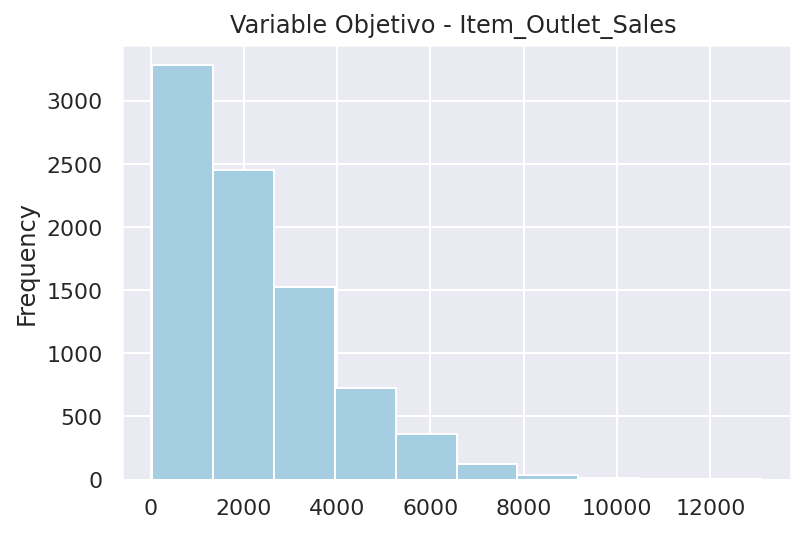

In [4]:
df["Item_Outlet_Sales"].plot.hist()
plt.title('Variable Objetivo - Item_Outlet_Sales ')
plt.show()

In [5]:
target = df["Item_Outlet_Sales"]
features = df[list(filter(lambda x: x!= target.name,df.columns))].copy()


In [6]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 732.6+ KB


## Entendiendo nuestras variables numericas

Tenemos dos columnas con valores nulos.
Hay que enteder la relacino entre cada columna para determinar el metodo cual nos va a ayudar a imputar estos valores.

## Item_Weight - valores faltantes
Los valores de con el prefijo Item en el nombre son variables que describen al producto.
1. El primer paso sera en imputar el promedio de cada producto a los valores faltantes. El peso al ser una varibales del producto podemos mirar otros registros para poder completar la infomracion del peso.
2. Validaremos nuevamente si quedan valores nulos. Si quedan valores nulos es probable que sean productos que solo se hayan vendido una sola vez en una sola tienda.
3. Para los remanente nulos imputaremos el promedio en base al tipo del producto.

In [7]:
features['Item_Weight'] = features.sort_values('Item_Weight').groupby('Item_Identifier').Item_Weight.apply(lambda x: x.fillna(x.mean()))
print("Total de valores faltantes para la columna Item_Weight", features['Item_Weight'].isna().sum()) #validamos si quedan valores nulos
features['Item_Weight'] = features.groupby('Item_Type').Item_Weight.apply(lambda x: x.fillna(x.mean())) #remplazar valores nulos por el promedio del peso en base al tipo de producto

Total de valores faltantes para la columna Item_Weight 4


Text(0.5, 1.0, 'Item Weigh by Item Type')

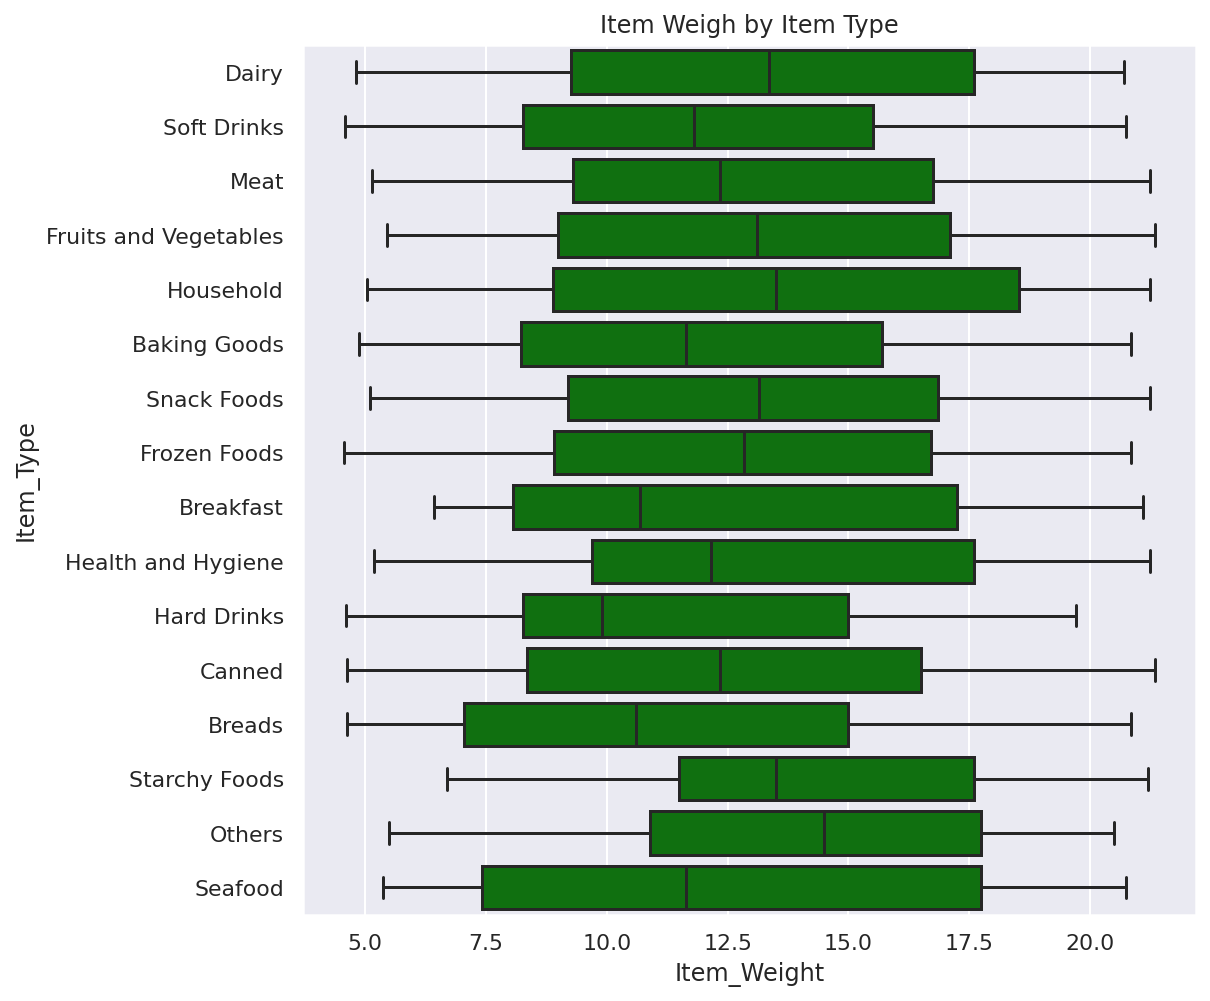

In [8]:
g = sns.boxplot(data=features,y='Item_Type',x='Item_Weight',color='green')
plt.gcf().set_size_inches(8, 8)
plt.title("Item Weigh by Item Type")

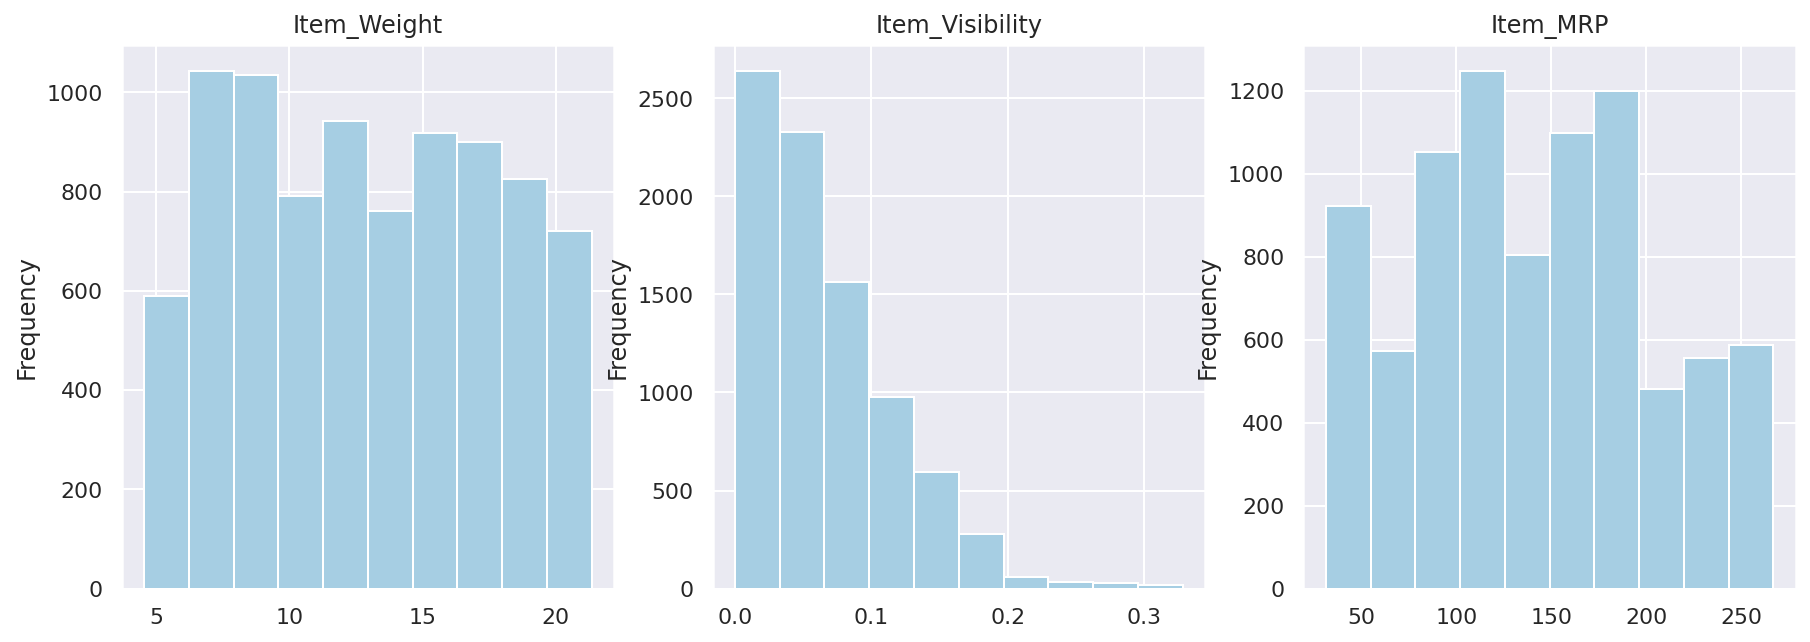

In [9]:
fig = plt.figure(figsize=(15,5))

for n, col in enumerate(["Item_Weight",	"Item_Visibility",	"Item_MRP"]):
  fig.add_subplot(1,3,n+1)
  features[col].plot.hist()
  plt.title(col)

observamos que Item_Vibility tiene una cola hacia la derecha (sesgo positivo), eliminaremos el sesgo positivo calculando la raiz cuadrada. 

Text(0.5, 1.0, 'SQRT Item_Visibility')

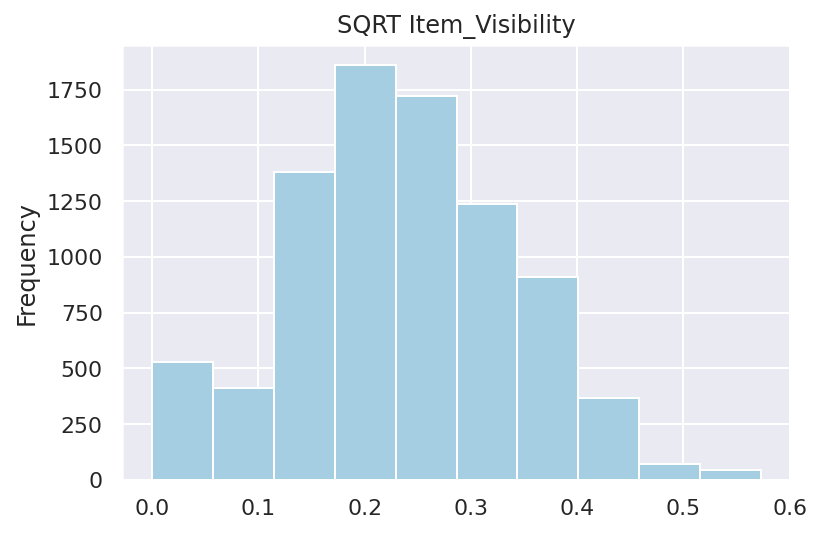

In [10]:
features['Item_Visibility'] = features.Item_Visibility.apply(np.sqrt)
features['Item_Visibility'].plot.hist(bins=10)
plt.title('SQRT Item_Visibility')

## Outlet_Establishment_Year
Vamos a transformar el año de la fecha a años de antiguedad.

In [11]:
features['Outlet_Establishment_Year'] =  features['Outlet_Establishment_Year'].transform(lambda x: x-x.min())

## Hay que escalar 
Tenemos que llevar todos los valores numericos a una misma escala.
Para esto debemos calcular el Z-socre que esto significa calcularle a cada columna su promedio y su desviacion estandar.
Para luego aplicar la siguiente formula
$$z = \frac{x - \mu}{\sigma}$$
Esto no indica a que distancia esta cada valor de su promedio centrando los alrededor del 0.

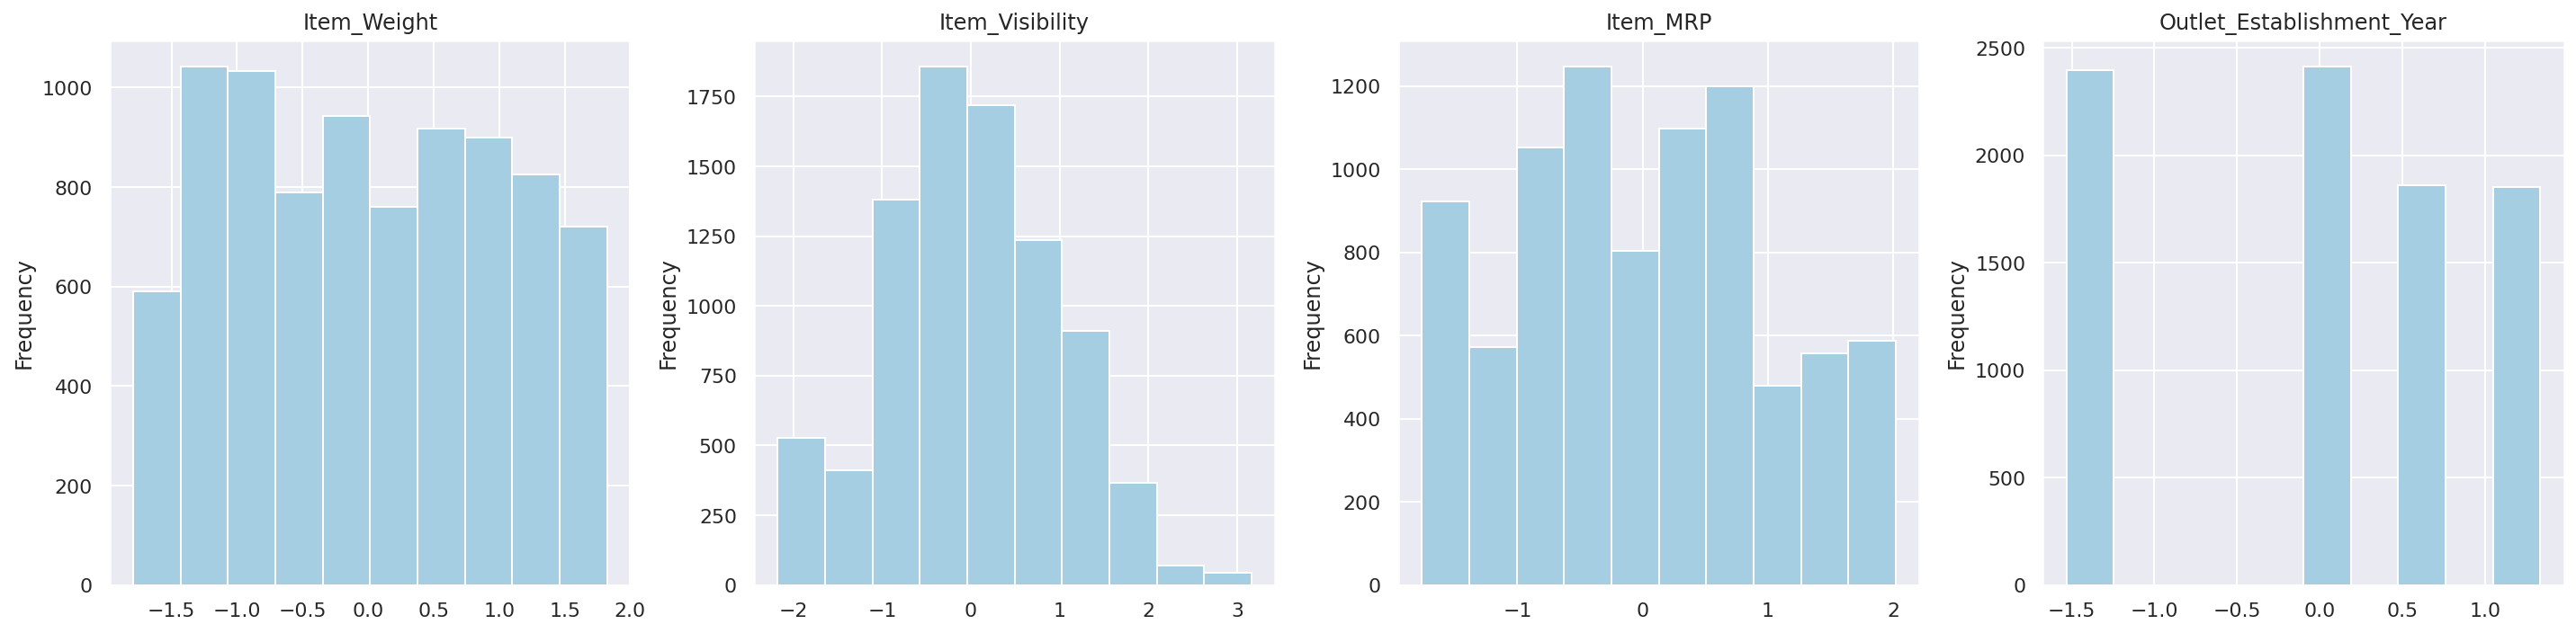

In [12]:
from sklearn.preprocessing import StandardScaler

sc_features =   StandardScaler()
features[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]  = sc_features.fit_transform(features[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']])
fig = plt.figure(figsize=(20,5))

for n, col in enumerate(["Item_Weight",	"Item_Visibility",	"Item_MRP",'Outlet_Establishment_Year']):
  fig.add_subplot(1,4,n+1)
  features[col].plot.hist()
  plt.title(col)
plt.tight_layout()

## Variables Categoricas

## Outlet_Size
Esta es nuestra segunda columna con valores faltantes.
Las columnas con el prefijo Outle describe el local donde se venden los productos.
1. Vamos a evaluar graficamente si hay algun patron entre estas columnas que tiene el prefijo Outlet.

In [13]:
out_size_null_example = features.loc[lambda x: x["Outlet_Size"].isnull()].head()
out_size_null_example

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
3,FDX07,1.362,Regular,-2.178,Fruits and Vegetables,0.660,OUT010,0.020,NaN,Tier 3,Grocery Store
8,FDH17,0.716,Regular,-0.974,Frozen Foods,-0.707,OUT045,0.498,NaN,Tier 2,Supermarket Type1
9,FDU28,1.362,Regular,0.686,Frozen Foods,0.752,OUT017,1.095,NaN,Tier 2,Supermarket Type1
25,NCD06,0.027,Low Fat,0.767,Household,-1.527,OUT017,1.095,NaN,Tier 2,Supermarket Type1
28,FDE51,-1.496,Regular,1.567,Dairy,-1.533,OUT010,0.020,NaN,Tier 3,Grocery Store


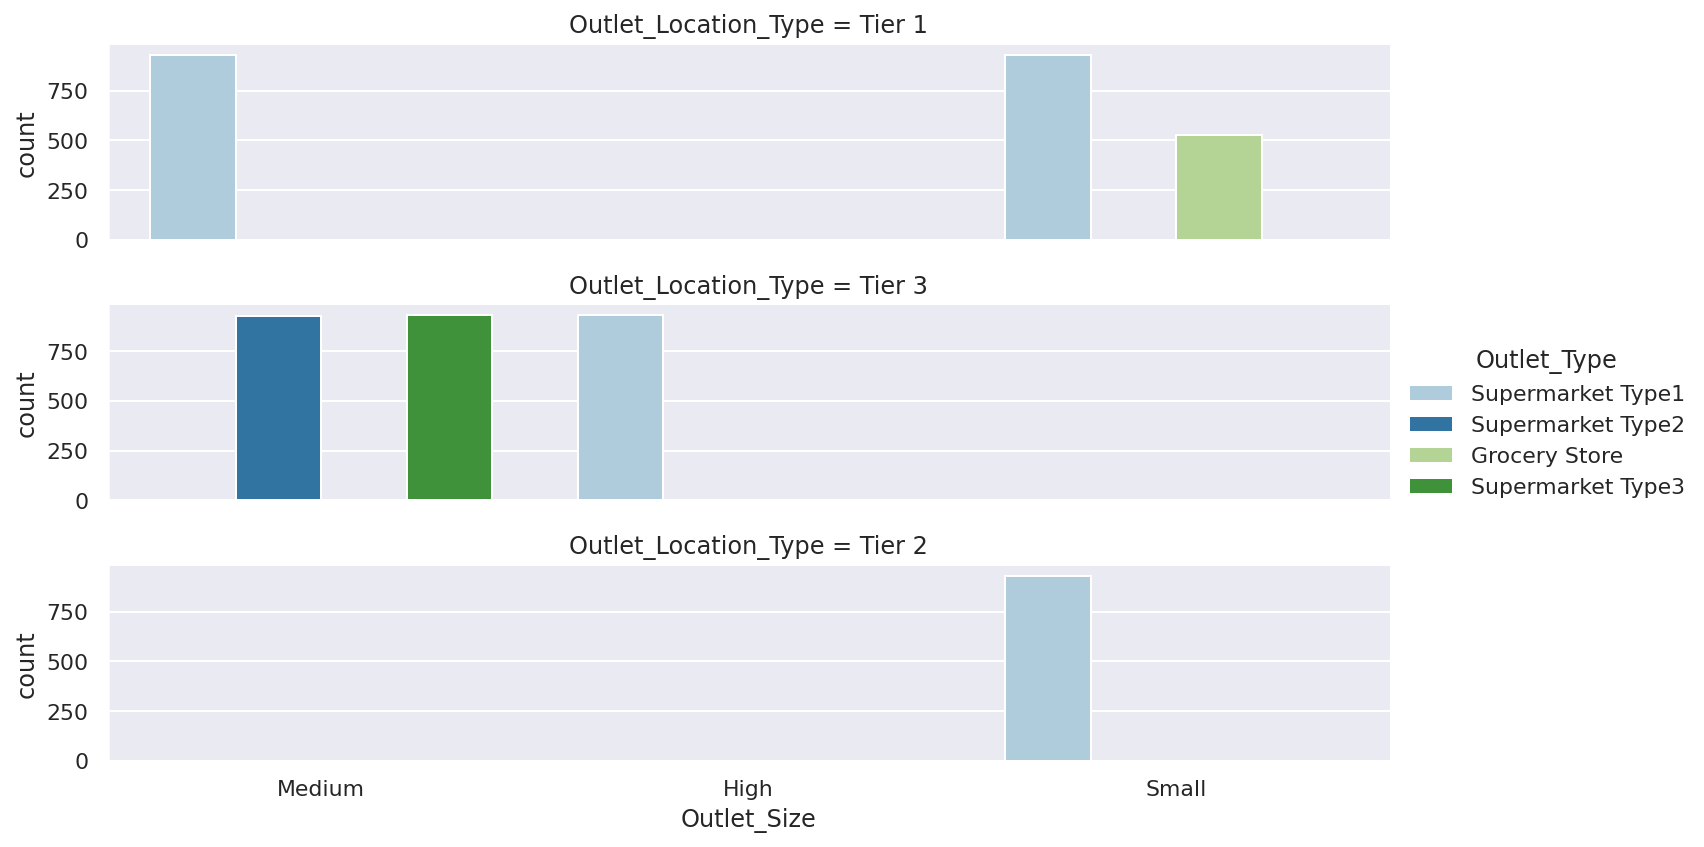

In [14]:
sns.catplot(x='Outlet_Size', row='Outlet_Location_Type',hue='Outlet_Type'
              ,data=features[['Outlet_Size','Outlet_Establishment_Year','Outlet_Location_Type','Outlet_Type']], kind="count",
              height=2, aspect=5);


Aqui observamos que Grosery Store solo existe en dentro del tipo de locacion Tier 1 y solo existen tiendas pequenas (small) cuando el Outlet_Type = 'Small'.
Podemos calcular la moda de Outlet_Size agrupando por 'Outlet_Type', para asignarle los valores faltantes.

In [15]:
features['Outlet_Size'] =  features.groupby('Outlet_Type').Outlet_Size.apply(lambda x: x.fillna(x.mode()[0]))

### Item_Fat_Content.
Tenemos que hacer transformaciones a las columnas categoricas, las computadoras no tienes la habilidad de procesar texto, aqui tenemos que traducir los valores a terminos numericos.


In [16]:
features.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

Basicamente tenemos dos categorias dentro de Item_Fat_Content, Low Fat (bajo en grasa) y Regular.
Aqui unificaremos todos los valores para cada categoria y crearemos una nueva columna, que tendra valor 1 para productos regulares y 0 para productos bajos en grasa.
Luego eliminaremos la columna Item_Fat_Content.

In [17]:
def Item_Fat_encoder(s)->pd.Series:
  s = s.str.upper().apply(lambda x: x.strip())
  return s.str.replace(r"L.*",'0',regex=True)\
            .str.replace(r"R.*",'1',regex=True)\
            .astype(int)
features['Item_Regular_Fat'] = Item_Fat_encoder(features['Item_Fat_Content'])
features.drop('Item_Fat_Content',axis=True,inplace=True)           

In [18]:
features = pd.get_dummies(features,columns=['Outlet_Size','Outlet_Type','Item_Type','Item_Identifier','Outlet_Location_Type','Outlet_Identifier'])
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Columns: 1600 entries, Item_Weight to Outlet_Identifier_OUT049
dtypes: float64(4), int64(1), uint8(1595)
memory usage: 13.3 MB


In [19]:
# Modelos
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
reg = RandomForestRegressor(max_depth=20,n_estimators=300, n_jobs=-1, random_state=42)
train_x, test_x, train_y, test_y = train_test_split(features, target.values.reshape(-1,1),test_size=0.3) 
# Entrenar modelo
reg.fit(train_x, train_y)

# Predecir valores
predict_test = reg.predict(test_x)
print(f'RMSE on test data: {mean_squared_error(test_y, predict_test):.2f}\nr2_score: {r2_score(test_y, predict_test):.2f}', )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RMSE on test data: 1227926.79
r2_score: 0.57


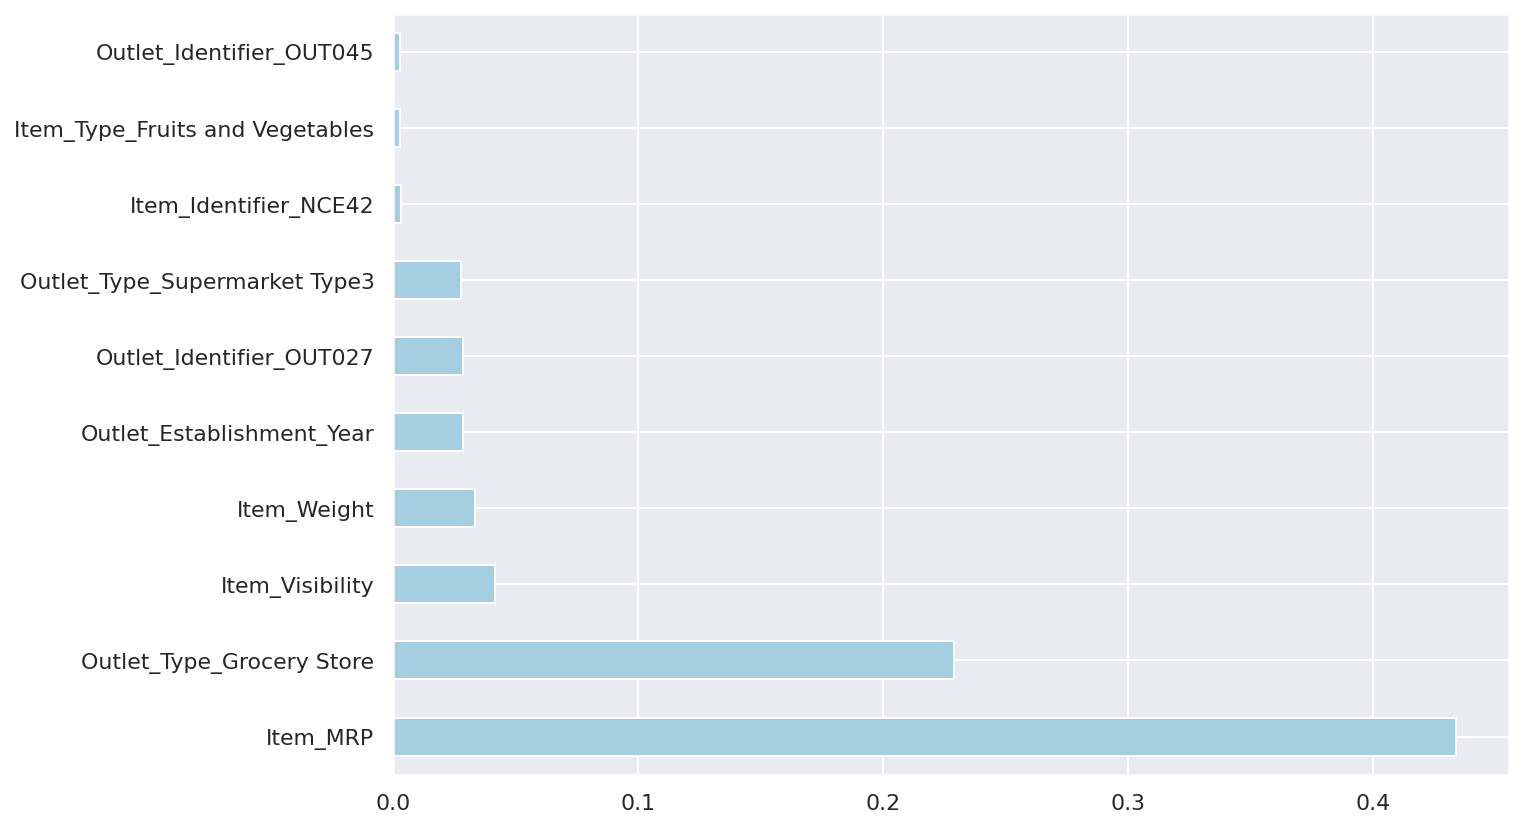

In [21]:
# Grafica de las 7 variables más importantes 
plt.figure(figsize=(10,7))
feat_importances = pd.Series(reg.feature_importances_, index = train_x.columns)
feat_importances.nlargest(10).plot(kind='barh');

In [22]:
test_x['Valor Verdadero'] = test_y.reshape(-1,1) 
test_x['Prediccion'] = predict_test.reshape(-1,1) 

In [23]:
test_x.iloc[:,-2:].head()

,Valor Verdadero,Prediccion
7571,"1,052.630",830.557
4890,"1,181.795","3,076.674"
7013,"4,250.467","3,178.184"
2010,689.103,430.890
2353,"3,086.649","2,767.692"
